# Finding the Best Markets to Advertise in for an E-Learning Company

The aim of this project is to analyse and find the best markets to advertise in for an E-learning company using statistics. The E-learning company majorly offers courses on programming for web and mobile development. It also offers courses for Data Science, game development, etc.

Our company offers subscriptions on a monthly basis at the rate of $59 per month.

## Importing the Dataset
For the analysis, we are using the data from freeCodeCamp's 2017 new coder survey. FreeCodeCamp offers similar learning courses as the company for which we are finding the optimal marketplace to advertise in. As freeCodeCamp has 400000 students, survey data is available abundantly which is from a similar target audience.

The survey data is available [at this link](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv). We'll read the data by using the same link.


In [1]:
import pandas as pd
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'

fcc = pd.read_csv(direct_link, low_memory = 0)

pd.options.display.max_columns = 150 #to not display truncated output for the head method below
fcc.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
fcc.shape

(18175, 136)

As it can be observed from the above output that the data has a lot of NaN(Not a Number) values. There are a total of 136 columns and 18,175 rows.

## Checking for Sample Representativity

As the company we're doing the analysis for majorly provides courses on Web development and mobile development, we analyse the data from freeCodeCamp survey to confirm whether the dataset has the right category of people. After this, we can analyse:
1. Where are the new coders located
2. What locations have the greatest number of coders
3. How much money new coders are willing to spend on learning through coding courses

In [3]:
fcc['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                            11.770595
  Front-End Web Developer                                                                                                            6.435927
  Data Scientist                                                                                                                     2.173913
Back-End Web Developer                                                                                                               2.030892
  Mobile Developer                                                                                                                   1.673341
                                                                                                                                      ...    
Data Engineer,   Front-End Web Developer,   DevOps / SysAdmin,   Data Scientist, Back-End Web Developer, Information Security        0.014302
Back-E

It can be seen from the above output that most of the people who took the surveys are interested in pursuing for a Web Development Job Role. A very less percentage of the population have an interest for the Job Role of Mobile Developer.

There are also people interested in domains such as Data Science, game development,etc.

As can be seen from the lower half of the above output, many people are interested in multiple Roles.
It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests.

In [4]:
job_interests_no_nulls = fcc['JobRoleInterest'].dropna()

splitted_strings = job_interests_no_nulls.str.split(",")

#generating a frequency table for the number of roles preferred
num_of_options = splitted_strings.apply(lambda x: len(x))
num_of_options.value_counts(normalize = True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

It is observed that only 31.65 percent of the people have a clear idea of which programming Role they want to pursue.
Most of the students are interested in more than one field and this can be beneficial for us as we offer courses for different fields. So the fact that new coders have mixed interests can be good for us.

We can now identify what proportion of the population is interested in taking Web or Mobile development.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


Text(0.5, 1.0, 'Distribution of Interest Role of New Coders')

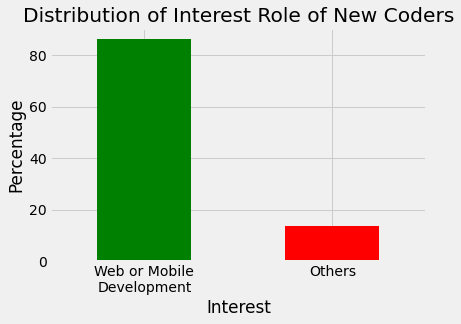

In [5]:
web_or_mobile = job_interests_no_nulls.str.contains('Mobile Developer|Web Developer')
frequency_distribution = web_or_mobile.value_counts(normalize = True)*100
print(frequency_distribution)
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

frequency_distribution.plot.bar(color = ['Green','red'])
plt.xlabel('Interest')
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or Mobile\nDevelopment','Others'], rotation = 0)
plt.title('Distribution of Interest Role of New Coders')

It can be seen that 86 percent of the new Coders want to take up Mobile or Web Development as their primary or secondary role of interest. This result makes the sample strongly representative for our task as majority of the courses offered by our company are in the field of Web and Mobile Development.

## Analysing the Location of New Coders

Now we'll begin by analysing the locations where most of the new coders are located. This allows us to identify the maketplace in which we'll have to advertise according to the Country of location of the new Coders.

The <b>CountryLive</b> column of the dataset provides information of the country in which the Coder is currently living. We can create a frequency distribution for countries and the number of coders in each country to identify from where the majority of the New Coders belong.

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Jordan                       0.014624
Nambia                       0.014624
Gibraltar                    0.014624
Cayman Islands               0.014624
Cuba                         0.014624
Name: CountryLive, Length: 137, dtype: float64


Text(0.5, 1.0, 'Distribution of New Coders across top 5 countries')

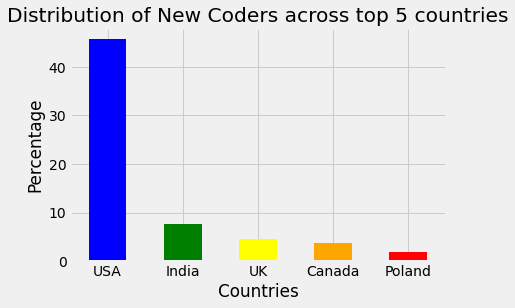

In [6]:
#Isolating only those coders that mentioned their Job Role Interests
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

#Creating distribution according to country 
frequency_country = fcc_good['CountryLive'].value_counts(normalize = True,dropna = True)*100
print(frequency_country)

#Plotting a graph for top 5 countries in the above frequency distribution
plt.style.use('fivethirtyeight')
frequency_country.head(5).plot.bar(color = ['blue','green','yellow','orange','red'])
plt.xticks([0,1,2,3,4],['USA','India', 'UK','Canada', 'Poland'], rotation = 0)
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.title('Distribution of New Coders across top 5 countries')

Most of the Coders live in USA followed by India. But we cannot ascertain that USA will be the best marketplace to advertise in. 
It is possible that most of the Coders are expecting to learn programming for free which goes against the cause for our intentions of making a profit and attacting customers.

To conclude that a marketplace is best for advertisement we need to analyse how much money are the Coders willing to pay for learning programming.

## Analysing how much the Coders are willing to pay to learn

As our company gives out subscriptions on a monthly basis, we would like to know how much the new coders are spending on the courses they have taken from the start date to the date of completion of the survey by them. We calculate this in terms of money spent per month to make sure that we analyse the data according to our requirements.

For this analysis we only consider the four major countries which are USA, India, UK and Canada. It is meaningful to do so as these countries comprise of nearly 60 percent of the coders and also because the major language in these countries is English, which also happens to be the language in which our courses are available.

First we create a new column/attribute, <b>Money_per_month</b> which is the money spent per month by each student.

In [7]:
# replacing 0 with 1 to avoid divide by zero error
fcc_good['MonthsProgramming'].replace(0,1,inplace=True)

# creating a new column 
fcc_good['money_per_month'] = fcc_good['MoneyForLearning']/fcc_good['MonthsProgramming']
# removing null values in money_per_month column
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]
fcc_good['money_per_month'].isnull().sum()

0

In [8]:
# finding the number of null values in the CountryLive column
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]
fcc_good['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
                            ... 
Yemen                          1
Vanuatu                        1
Guatemala                      1
Turkmenistan                   1
Cuba                           1
Name: CountryLive, Length: 131, dtype: int64

In [9]:
fcc_country_summary = fcc_good.groupby( ['CountryLive'] ).mean()

countries = ['United States of America','India','United Kingdom','Canada']
fcc_country_summary['money_per_month'][countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

Coders in USA are willing to pay the most money per month on average. This can be justified as USA has good economic conditions and hence the people might be willing to spend more money on learning programming on an average.

But in the case of India, it is a bit suspicious that people in India which has relatively poor economic conditions as compared to UK and Canada, the average money spending is 145 dollars. This value is more than UK and Canada which have $45 and $113 as average spend per month.

This can be caused by some large outlier value for the country India or presence of some small value which is an outlier for UK and Canada. It is also possible that the above result is correct and Indian coders in fact spend more on learning. We'll analyse the outlier values to be sure.

## Examining the outliers

To get an idea about the outliers, we first make box plots for each country corresponding to the money_per_month column.

<AxesSubplot:title={'center':'Canada'}>

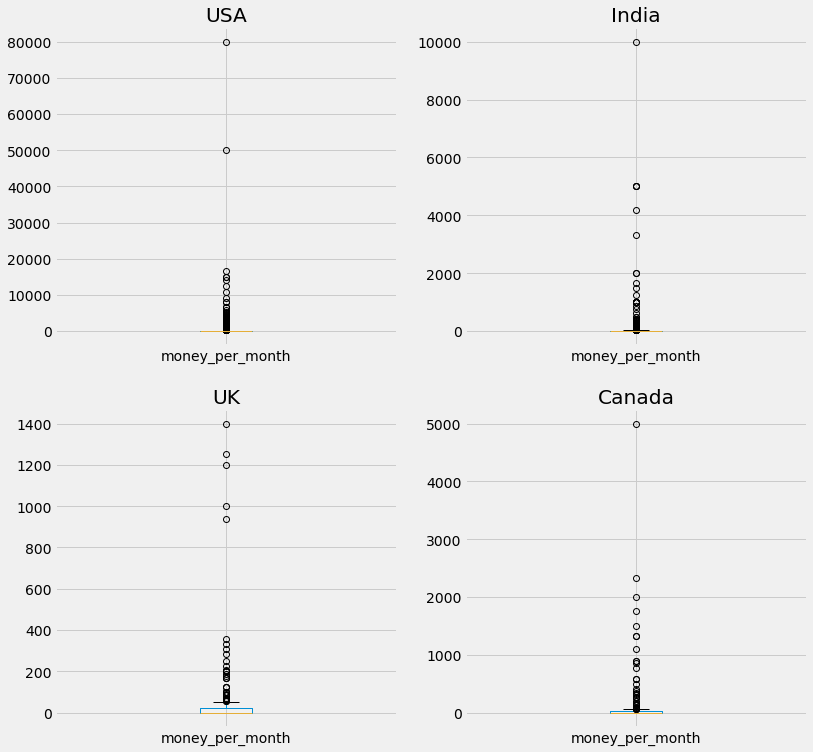

In [10]:

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
fcc_good[fcc_good['CountryLive'] == 'United States of America']['money_per_month'].plot.box(title = 'USA')

plt.subplot(2,2,2)
fcc_good[fcc_good['CountryLive'] == 'India']['money_per_month'].plot.box(title = 'India')

plt.subplot(2,2,3)
fcc_good[fcc_good['CountryLive'] == 'United Kingdom']['money_per_month'].plot.box(title = 'UK')

plt.subplot(2,2,4)
fcc_good[fcc_good['CountryLive'] == 'Canada']['money_per_month'].plot.box(title = 'Canada')



We can see from the above box plot that USA has 2 extreme outlier values which contribute a lot to the average monthly spend calculated before. Thus we get rid of these outliers first.

To remove the extreme outliers, we discard all the rows in which the coder spent more than $20000 as it does not seem possible that normally a person would spend so much money on bootcamps/online learning courses. We can do this for every country and not just USA.

In [11]:
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]


In [12]:
fcc_country_summary = fcc_good.groupby('CountryLive').mean()
fcc_country_summary['money_per_month'][countries]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The average monthly spend per country has decreased for USA. Now we can do further analysis to look at the outlier values of other countries.

Text(0, 0.5, 'Money Per Month')

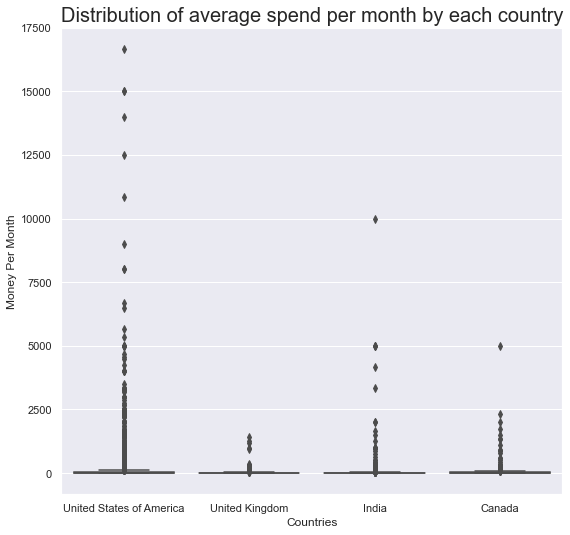

In [13]:
import seaborn as sns
sns.set(rc = {'figure.figsize': (8,8)})
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y='money_per_month', x='CountryLive', data = only_4)
plt.title('Distribution of average spend per month by each country', size = 20)
plt.xlabel('Countries')
plt.ylabel('Money Per Month')

We can see some extreme outliers for India in which the coders seem to have spent more than $2500. This should be analysed in detail to make sure whether this money was spent on multiple bootcamps. If that is the case then we should remove these values from the data because usually people don't take more than one bootcamp/course.

In [14]:

outliers_india = only_4[(only_4['CountryLive'] == 'India') & (only_4['money_per_month'] >= 2500)] 
outliers_india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

The coders have not attended any bootcamps and three of the above six coders have been coding for less than 3 months. We can remove these rows as these are not representative of a normal coder.  Usually a coder won't spend so much of money on an online course.

In [15]:
#removing the outliers
only_4 = only_4.drop(outliers_india.index)

In the previous box-plots, USA seems to have many values above $6000 and these seem to be outliers. But before removing them, we must first be certain that these values can be called outliers. For this we'll isolate the information correspoding to these values.


In [16]:
usa_outliers = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['money_per_month'] >= 6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

We can observe that only 6 of the 11 people in the above list have attended a bootcamp. Thus the high value spent by these people is justified. So we can remove the participants who did'nt attend a bootcamp and still spent such a high amount.

We can also remove the participants who have spent less than 3 months on programming. Spending such a huge amount of money in less than 3 months is not possible for an average customer. 

In [17]:
us_no_bootcamp = usa_outliers[usa_outliers['AttendedBootcamp'] != 1]
only_4 = only_4.drop(us_no_bootcamp.index)

us_less_3_mth = only_4[(only_4['CountryLive'] == "United States of America") & 
                       (only_4['money_per_month'] >= 6000) &
                       (only_4['MonthsProgramming'] <= 3)]
only_4 = only_4.drop(us_less_3_mth.index)

In Canada, there is one value which is more than $2500 in the above box-plot. We now isolate and analyse this value.

In [20]:
canada_outlier = only_4[(only_4['CountryLive'] == 'Canada') & (only_4['money_per_month'] >= 2500)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


As the person has spent less than 3 months programming, we can remove this outlier from our analysis.

In [21]:
only_4 = only_4.drop(canada_outlier.index)

In [23]:
only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

Text(0, 0.5, 'Money Per Month')

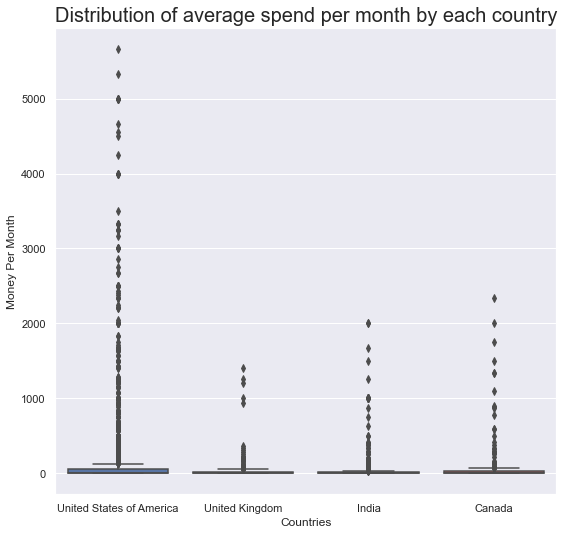

In [24]:
sns.set(rc = {'figure.figsize': (8,8)})
sns.boxplot(y='money_per_month', x='CountryLive', data = only_4)
plt.title('Distribution of average spend per month by each country', size = 20)
plt.xlabel('Countries')
plt.ylabel('Money Per Month')

## Choosing the Two Best Markets

As previously mentioned, our company offers courses at the rate of 59 USD per course. United Kingdom's average monthly spend rate is only 45 USD and hence it cannot be considered as one of the top 2 best Markets.

From the above analysis on the average money spent per month per country, USA and Canada seem to be the best market places. But we have to also consider India as it also makes the cut in terms of average money spent per month.

USA should certainly be one of the marketplace as people there are on an average willing to spend nearly 145 USD. For the second marketplace, we should consider either India or Canada. To choose one from the two, we can analyse the distribution of population in terms of location.

In [26]:
only_4['CountryLive'].value_counts(normalize = True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

It can be seen that India contributes to nearly 12 percent of the people. As India and Canada both make the cut on the basis of money spent per month, we have to choose India as it also contributes more number of potential coders who might opt to take an online course.

Thus if we have to select 2 countries,  it would be USA and India with the distribution of funding for adverising being more for USA as compared to India.

It is also possible to invest in advertising in USA, India and Canada if we can increase the number of marketplace to advertise in by dividing the funds accourdingly.

## Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.